# Concrete strenght prediction using Lasso regretion

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn. metrics import r2_score, mean_absolute_error, mean_squared_error

In [10]:
df = pd.read_csv('data/concrete_data.csv')

df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [12]:
df.shape

(1030, 9)

### Data Preprocessing

In [13]:
#checking for null values
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [14]:
#checking for duplicate rows
df.duplicated().sum()

25

In [21]:
df.loc[df.duplicated(), :]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [26]:
#dropping duplicate rows
df.drop_duplicates(keep='first', inplace=True)
df.shape

(1005, 9)

### EDA

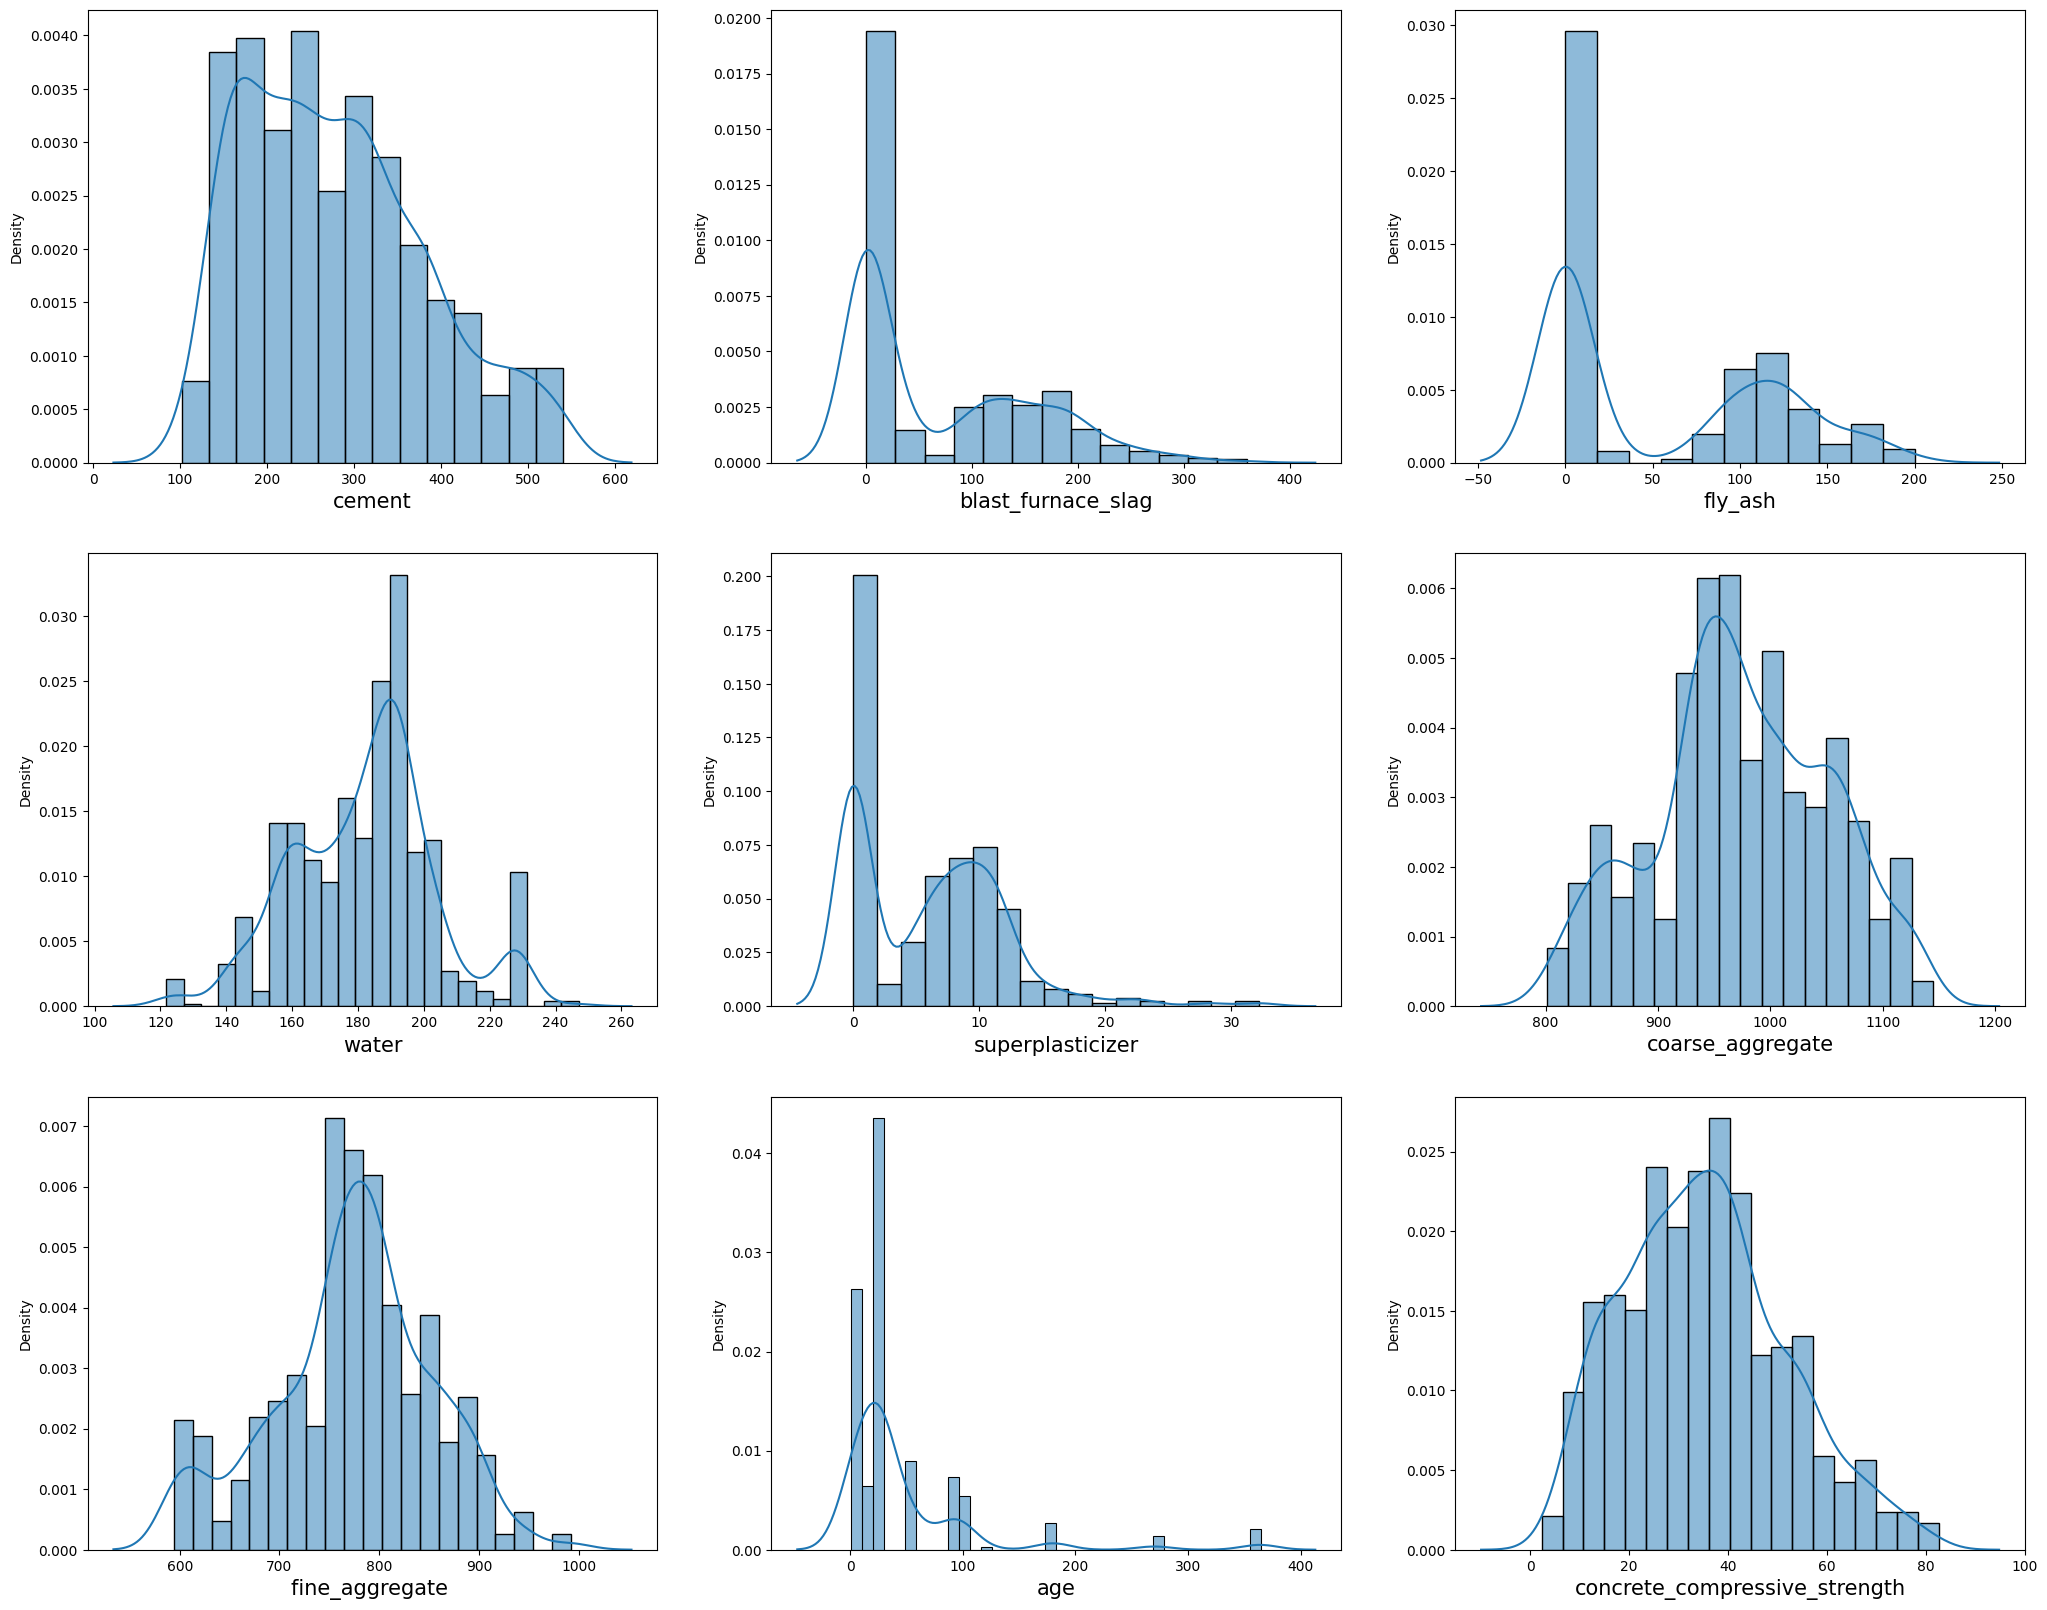

In [28]:
#plotting distributions of features

plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(df[col], kde=True, stat='density', kde_kws=dict(cut=3))
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1


<AxesSubplot: >

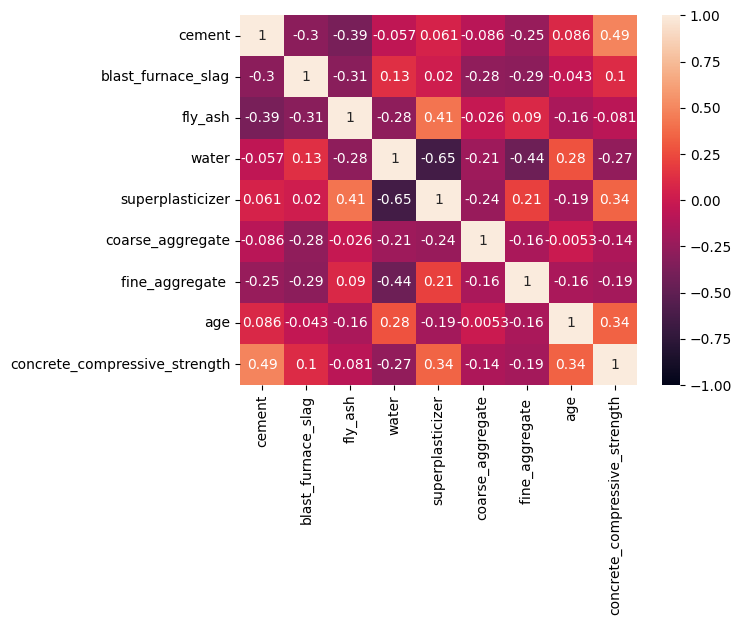

In [31]:
#correlatin matrix
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

* Seems there are no multicollinearity between features

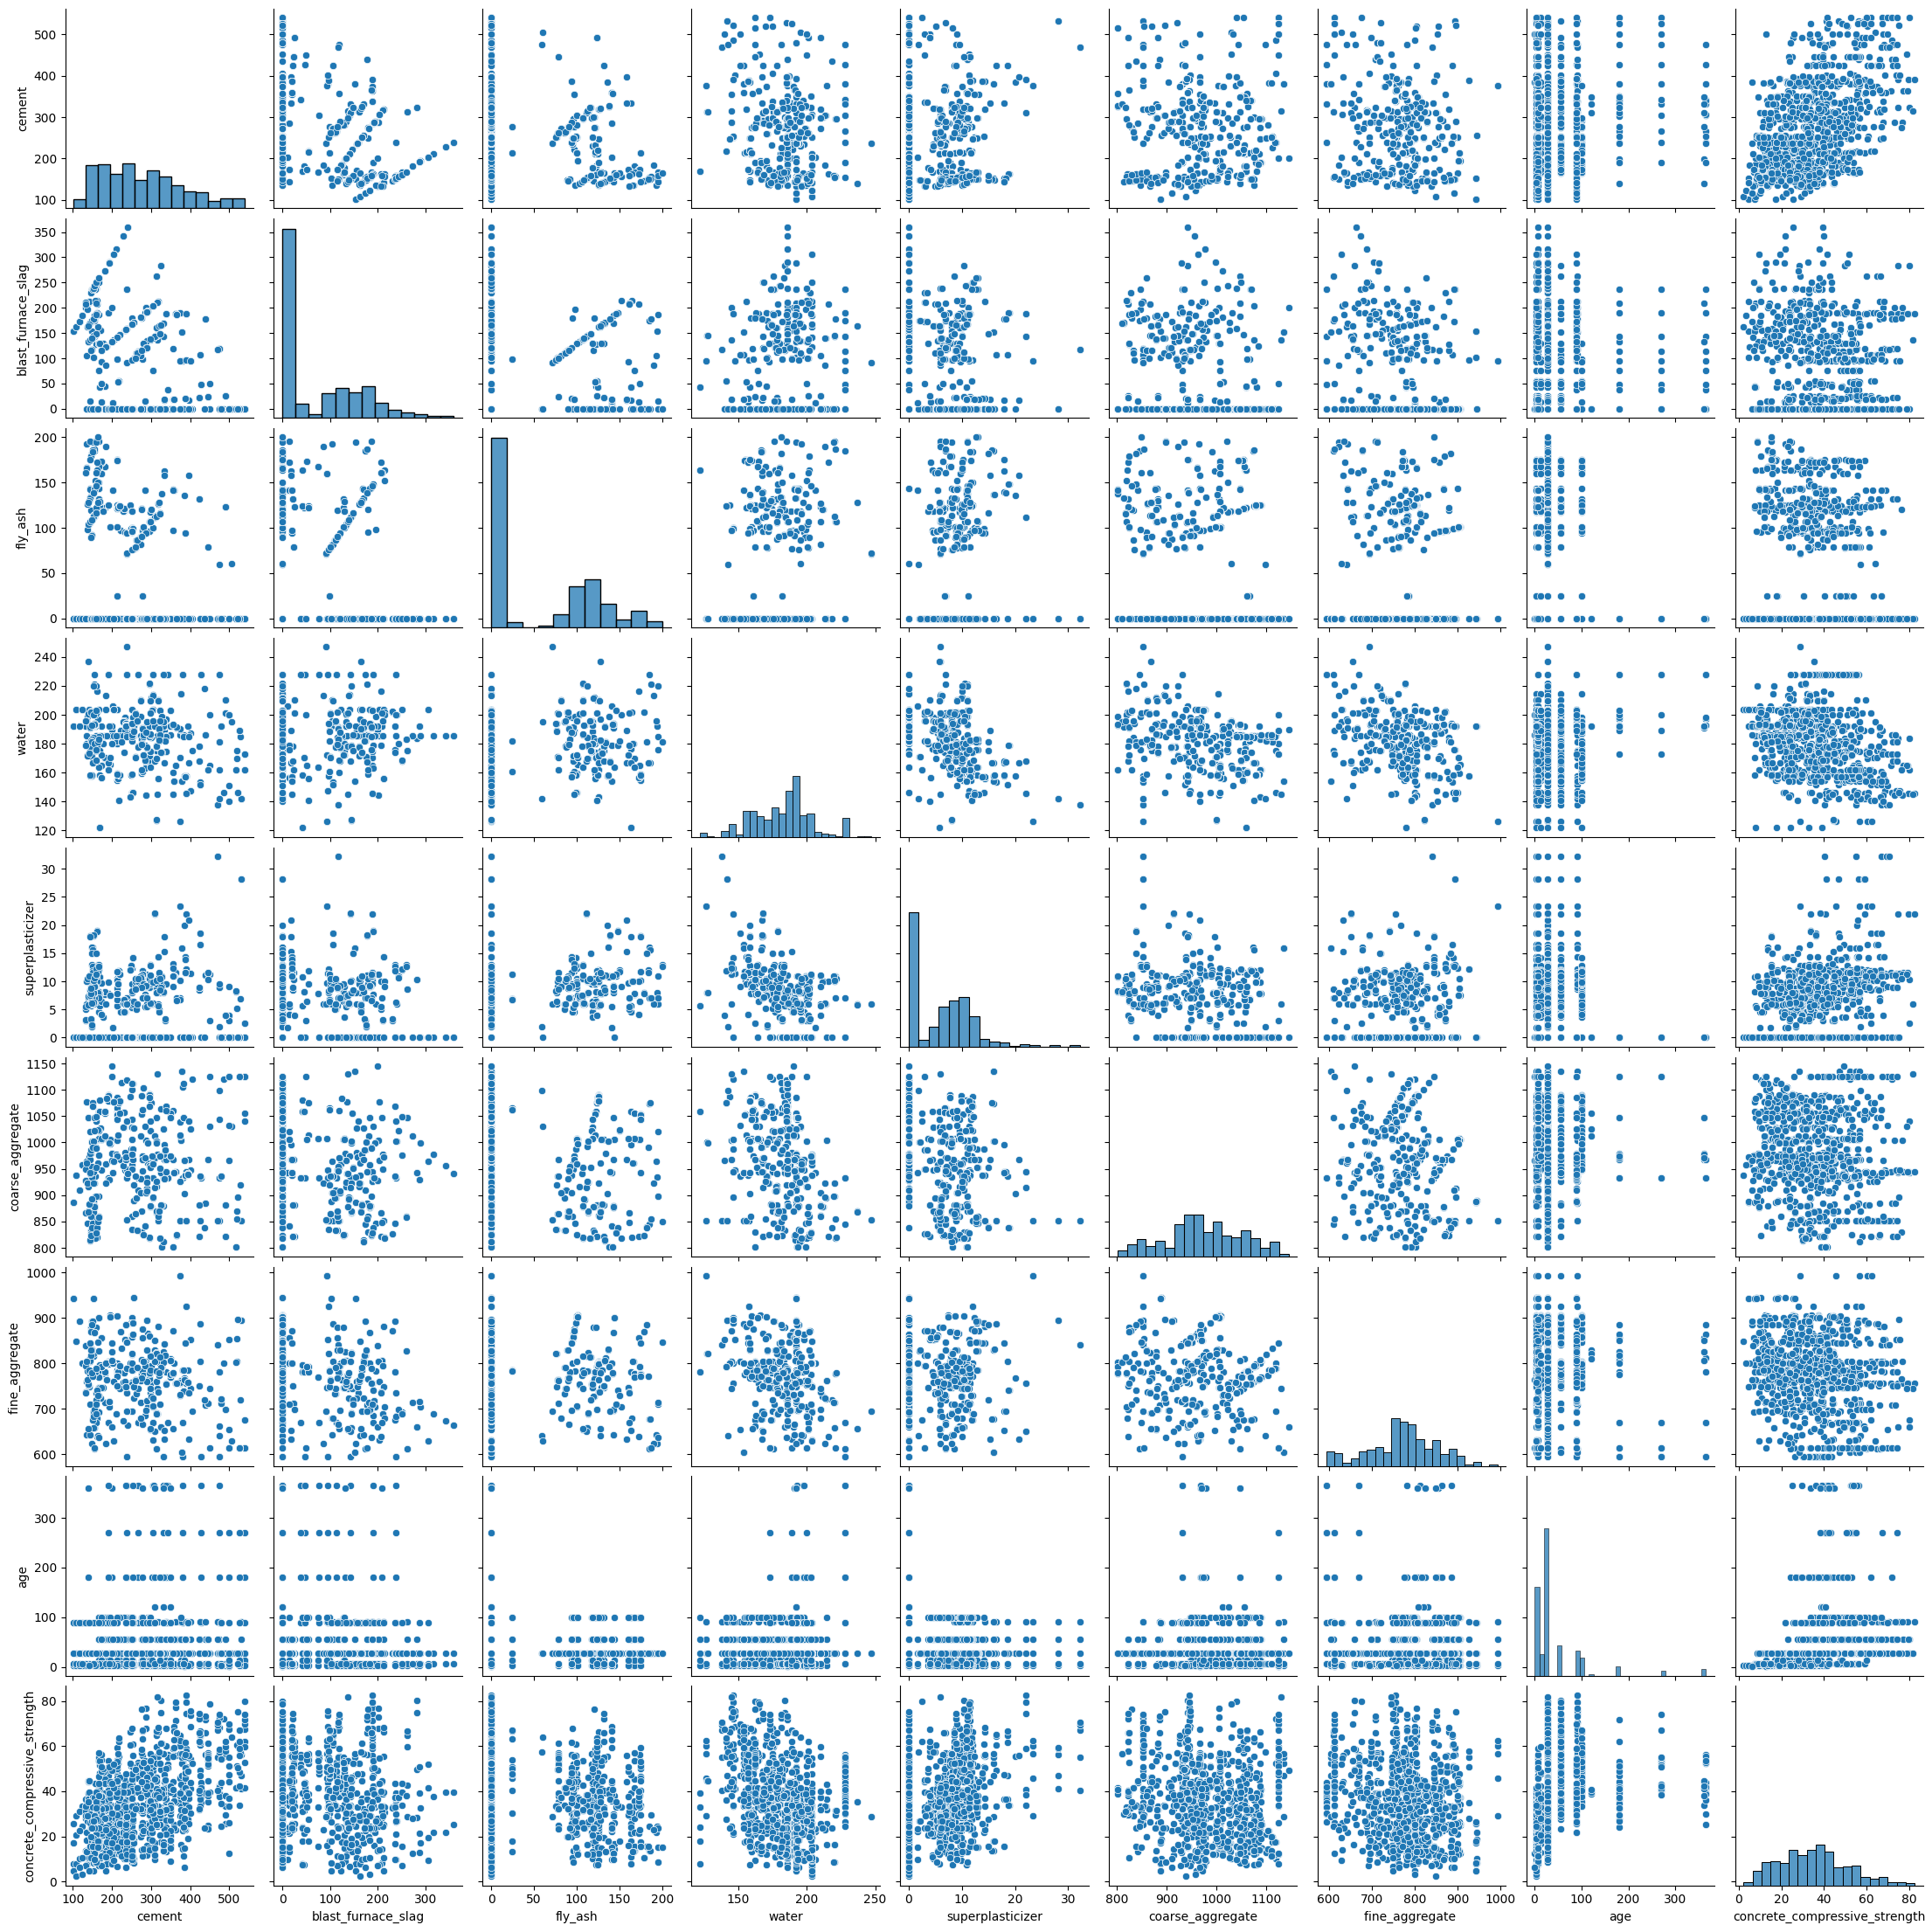

In [32]:
#pairplot
sns.pairplot(df)

* Cement and strength has linear relationship

### Seperating features and target

In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
#splitting dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)